# Non Linear Regression

### Importing Modules

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

### Model & Setting up NR

\begin{align}
\large
y_i = \dfrac{100x_i}{\theta + x_i} + \sigma\epsilon_i, \hspace{10 mm} i = 1, 2,..., 100. \\
\end{align}

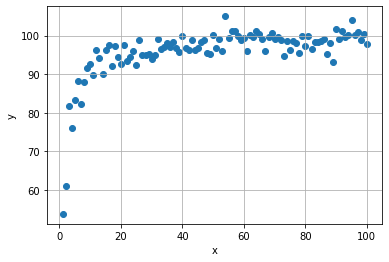

In [2]:
x = np.arange(1,101)
theta = 1
sigma = 2
ei = np.random.normal(loc = 0.0, scale = 1, size = x.shape)
y = ((100*x)/(theta +x)) + sigma* ei

# Plotting
plt.scatter(x, y)
plt.xlabel('x'), plt.ylabel('y')
plt.grid()
plt.show()

\begin{align}
\large
I(\theta)  = \frac{1}{2} \Sigma_{i=1}^{n}(y_i - \dfrac{ax_i}{\theta + x_i})^{2}
\\
\\
\large
I'(\theta) = - \Sigma_{i=1}^{n}(y_i - \dfrac{ax_i}{\theta + x_i})\hspace{5mm}\dfrac{ax_i}{(\theta + x_i)^2}
\\
\\
\large
I''(\theta) = -2\Sigma_{i=1}^{n}\dfrac{ay_ix_i}{(\theta + x_i)^3} +3   \Sigma_{i=1}^{n}\dfrac{a^2x_i^2}{(\theta + x_i)^4}
\\
\\
\end{align}

1. Use a Newton-Raphson algorithm to find the least squares estimator, $\hat\theta$, for $\theta$
(take the initial value $\theta_0$ = 1).

*Newton-Raphson*

\begin{equation}
x = x_0 - \frac{f (x_0)}{f'(x_0)} \\
\theta_{t+1} = \theta_{t} - \frac{L'(\theta)}{L''(\theta)}.
\end{equation}

### Least Squares Estimator

*Newton-Raphson Set-up for Least Squares*

In [3]:
def newton(x, y, guess, tolerance = 0.00001, output_message = False):
    """
    Args:
        guess (float): initial value for parameter
        tolerance (float): tolerance
    
    \begin{equation}
    t = t_0 - \frac{f(x_0)}{f'(x_0)}.
    \end{equation}

    """
    #Initialize
    t_0 = guess
    difference = tolerance * 5 # Enter Loop
    iter_number = 0

    status_message = 'Starting with Guess = ' + str(t_0) + '\n'
    while abs(difference) > tolerance:
        
        # calculate values of function and derivative and t+1 value
        
        f =  np.sum(    (y- ((100*x)/(t_0 +x)))   * ((100*x)/(t_0 +x)**2) )               
        f_prime = - 2 * np.sum((100*y*x) /(t_0 + x)**3) + 3 *np.sum(((100**2)*(x**2)) /(t_0 + x)**4)
        t = t_0 - (f / f_prime)

        # calculate difference and update iteration state
        difference = t - t_0
        t_0 = t
        iter_number += 1
        status_message += 'Iteration #' + str(iter_number) + ':= ' + str(t) + '\n'
        
    status_message += 'Total No. of Iterations = '  +  str(iter_number)
    
    if output_message:
        return t_0, status_message
    return t_0    

In [4]:
theta_hat, message = newton(x, y, guess = 1.4, output_message = True)
print(message)
print('Theta_hat =', theta_hat)

Starting with Guess = 1.4
Iteration #1:= 0.8672669803328653
Iteration #2:= 0.9785045483821829
Iteration #3:= 0.988957578453745
Iteration #4:= 0.9890366328519096
Iteration #5:= 0.9890366373080094
Total No. of Iterations = 5
Theta_hat = 0.9890366373080094


2. Estimated value of $\hat\theta$, <br>
$\hspace{30mm}\hat\theta$ = 0.98903

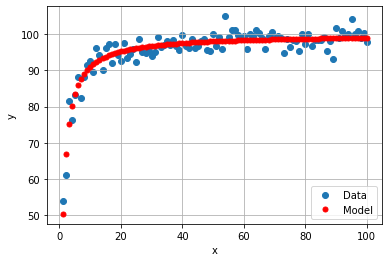

In [5]:
plt.scatter(x, y, label='Data')
plt.plot(x, ((100*x)/(theta_hat +x)), '.r', markersize = 10, label='Model')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Variance of Estimator

\begin{equation}
\large
Var I'(\theta) = \sigma^2 \Sigma_{i=1}^{n}(\dfrac{\partial f(\theta, x_i)}{\partial \theta})^2 \\
\large
\dfrac{\partial f(\theta, x_i)}{\partial \theta} = \dfrac{\partial \dfrac{ax_i}{\theta + x_i}}{\partial \theta} =  -\dfrac{ax_i}{(\theta + x_i)^2}
\\
\\
\large
Var \hat\theta = \sigma^2\dfrac{\Sigma_{i=1}^{n}(\dfrac{\partial f(\theta, x_i)}{\partial \theta})^2}{I''(\hat\theta)^2}
\end{equation}

In [6]:
y_predicted = (100*x)/(theta_hat +x)
var_xy = (1/(len(x)-1) * np.sum( (y-y_predicted )**2))
var_I_prime = var_xy * np.sum(       ((100*x)/    ((theta_hat+x)**2)))**2
f_prime = - 2 * np.sum((100*y*x) /(theta_hat + x)**3) + 3 *np.sum(((100**2)*(x**2)) /(theta_hat + x)**4)
I_prime2 = f_prime
var_theta_hat = var_I_prime / (I_prime2**2)
var_theta_hat

0.07257137258214746

4. Estimated value of $Var(\hat\theta)$, <br>
$\hspace{30mm}Var(\hat\theta)$ = 0.072